Goals

1. As real-time, high-freq as possible data points about the global economy
2. Start with major yield curves and show composition / contributions to total yield curves of various countries - where are yield curves flattening, where steepening (contrib are to one global yieldcurve, weighted by GDP?)
3. Include nowcasts
4. Scrape important headlines?



### Import libraries

In [4]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas_datareader.data as web
import datetime

%matplotlib inline
plt.close('all')

### US Treasury bond yields

#### Load data US treasury bond yields

In [ ]:
yieldcurve_full_data = quandl.get("USTREASURY/YIELD", authtoken="e4FyZJfz6ukboUWG4Pm_")

In [ ]:
yieldcurve_DF = pd.DataFrame(yieldcurve_full_data)
yieldcurve_full_data.to_csv("yieldcurve_full_data.csv")    # dump into CSV file

In [ ]:
yieldcurve_DF.tail()

#### Plot US Treasury yields for different tenors 

In [ ]:
yieldcurve_DF.plot(subplots=True, layout=(4,3), figsize=(16, 10))
plt.show()

In [ ]:
#yieldcurve_DF.plot(colormap="cubehelix",figsize=(15, 15)) # subplots=True, layout=(4,3))
#plt.show()

In [ ]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 3, 27)

In [ ]:
gdp = web.DataReader('GDP', 'fred', start, end)
gdp.head()

In [ ]:
gdp.loc['2013-01-01']

In [ ]:
inflation = web.DataReader(['CPIAUCSL', 'CPILFESL'], 'fred', start, end)

In [ ]:
inflation.head()

#### 10-Year Treasury Constant Maturity Minus 3-Month Treasury Constant Maturity 

In [ ]:
fredyc = web.DataReader(['T10Y3MM'], 'fred', start, end)

In [ ]:
fredyc.head()

In [ ]:
fredyc.tail()

#### 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity 

In [ ]:
TSY2y10y_fred = web.DataReader(['T10Y2Y'], 'fred', start, end)

In [ ]:
TSY2y10y_fred.tail()

In [ ]:
# finalised dataframe write to different file  pandasDF.to_csv("......csv")

In [5]:
import os
os.getcwd()
os.listdir()

['.ipynb_checkpoints',
 '6m.csv',
 'DE10y.csv',
 'DE1y.csv',
 'DE20y.csv',
 'DE2y.csv',
 'DE30y.csv',
 'DE5y.csv',
 'DE6m.csv',
 'Macro dashboard-backup .ipynb',
 'Macro dashboard.ipynb',
 'ust.csv',
 'yieldcurve_full_data.csv']

In [ ]:
yieldcurve_DF.columns

In [ ]:
TSY3m2y =  yieldcurve_DF['2 YR'] - yieldcurve_DF['3 MO']

In [ ]:
TSY3m2y.plot()

In [ ]:
TSY2y10y_quandl =  yieldcurve_DF['10 YR'] - yieldcurve_DF['2 YR']

In [ ]:
TSY2y10y_quandl.plot()

In [ ]:
TSY3m10y_quandl =  yieldcurve_DF['10 YR'] - yieldcurve_DF['3 MO']

In [ ]:
TSY3m10y_quandl.plot()

In [ ]:
TSY2y10y_quandl.loc['20100102':].plot(figsize=(16, 8))
plt.show()

In [ ]:
TSY2y10y_fred.loc['20100102':].plot(figsize=(16, 8))
plt.show()

#### Checking for missing values

In [6]:
import missingno as msno

In [ ]:
msno.bar(yieldcurve_DF.sample(7295), figsize=(10, 4))
plt.show()

## Germany Bund yields and curve

In [55]:
# assigns URL for Bund instruments to input variable
DE6m_input = ("https://www.bundesbank.de/statistic-rmi/StatisticDownload?tsId=BBK01.WT3210&mode=its&its_fileFormat=csv&its_csvFormat=de&its_currency=default&its_dateFormat=default&its_from=&its_to=")
DE1y_input = ("https://www.bundesbank.de/statistic-rmi/StatisticDownload?tsId=BBK01.WT3211&mode=its&its_fileFormat=csv&its_csvFormat=de&its_currency=default&its_dateFormat=default&its_from=&its_to=")
DE2y_input = ("https://www.bundesbank.de/statistic-rmi/StatisticDownload?tsId=BBK01.WT3213&mode=its&its_fileFormat=csv&its_csvFormat=de&its_currency=default&its_dateFormat=default&its_from=&its_to=")
DE5y_input = ("https://www.bundesbank.de/statistic-rmi/StatisticDownload?tsId=BBK01.WT3219&mode=its&its_fileFormat=csv&its_csvFormat=de&its_currency=default&its_dateFormat=default&its_from=&its_to=")
DE10y_input = ("https://www.bundesbank.de/statistic-rmi/StatisticDownload?tsId=BBK01.WT3229&mode=its&its_fileFormat=csv&its_csvFormat=de&its_currency=default&its_dateFormat=default&its_from=&its_to=")
DE20y_input = ("https://www.bundesbank.de/statistic-rmi/StatisticDownload?tsId=BBK01.WT3449&mode=its&its_fileFormat=csv&its_csvFormat=de&its_currency=default&its_dateFormat=default&its_from=&its_to=")
DE30y_input = ("https://www.bundesbank.de/statistic-rmi/StatisticDownload?tsId=BBK01.WT3500&mode=its&its_fileFormat=csv&its_csvFormat=de&its_currency=default&its_dateFormat=default&its_from=&its_to=")

### old

In [ ]:
def bunds_clean(URL, tenor):
    """
    transforms very poorly formatted CSV file from German Bundesbank
    into usable file for analysis and visualtion
    """
    DF = pd.read_csv(URL, sep=';')
    
    assert type(tenor) == str, "Tenor needs to be a string"
        
    # remove rows without relevant data
    DF = DF[4:-1]
    # rename columns to give meaningful name
    new_columns = DF.columns.values
    new_columns[0] = 'DATE'
    new_columns[1] = tenor 
#   new_columns[1] = 'RATE'
    DF.columns = new_columns
    
    # assign last column to variable 'dropcolumn'
    dropcolumn = DF.columns[2]
    # use dropcolumn to remove rows that have missing values (indicated by string in German instead of NaN)
    DF = DF[DF[dropcolumn] != 'Kein Wert vorhanden']
    # now remove last column 
    DF = DF.drop([dropcolumn], axis=1)

    # reset dataframe index to 0 - was not the case because we removed rows earlier
    DF.reset_index(drop=True, inplace=True)
    
    # replace German comma (,) with dot in RATE column
    DF[tenor] = [x.replace(',', '.') for x in DF[tenor]]
#   DF['RATE'] = [x.replace(',', '.') for x in DF['RATE']]

    # convert RATE column values from string to float
#   DF.RATE = DF.RATE.astype(float)
    DF[tenor] = DF[tenor].astype('float')
    # convert DATE column values from string to datetime
    DF['DATE'] = pd.to_datetime(DF['DATE'])

    # replace dataframe index column with DATE column
    DF.set_index(['DATE'], drop=True, inplace=True)
    
    return DF

### collapsed above

In [50]:
# calls data cleaning function and passes URL into it, backs up output as CSV file afterwards

tenor = '6m'
DE6m = bunds_clean(DE6m_input, tenor)
DE6m.to_csv("DE6m.csv")

tenor = '1y'
DE1y = bunds_clean(DE1y_input, tenor)
DE1y.to_csv("DE1y.csv")

DE2y = bunds_clean(DE2y_input, tenor)
DE2y.to_csv("DE2y.csv")

DE5y = bunds_clean(DE5y_input, tenor)
DE5y.to_csv("DE5y.csv")

DE10y = bunds_clean(DE10y_input, tenor)
DE10y.to_csv("DE10y.csv")

DE20y = bunds_clean(DE20y_input, tenor)
DE20y.to_csv("DE20y.csv")

DE30y = bunds_clean(DE30y_input, tenor)
DE30y.to_csv("DE30y.csv")


In [ ]:
DE2y.tail()

In [ ]:
DE10y.tail()

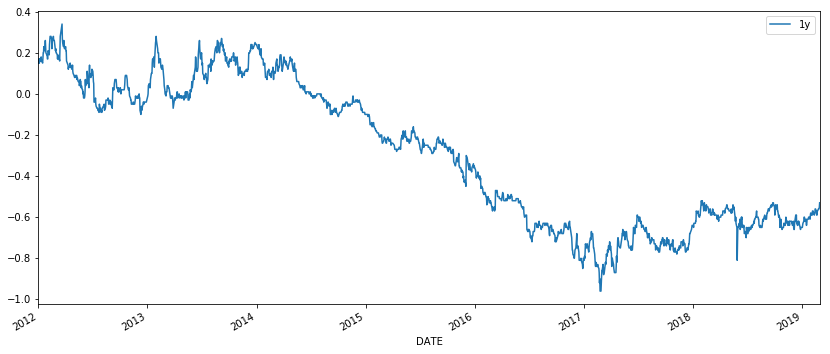

In [54]:
start = '20120101'
end = ''
DE2y.loc[start:].plot(figsize=(14, 6))
plt.show()

In [ ]:
start = '20120101'
end = ''
DE10y.loc[start:].plot(figsize=(14, 6))
plt.show()

In [ ]:
DE2y10y =  DE10y['RATE'] - DE2y['RATE']

In [ ]:
DE2y10y.loc[start:].plot(figsize=(14, 6))
plt.show()

In [7]:
# assigns URL for Bund instruments to input variable
DE6m_input = ("https://www.bundesbank.de/statistic-rmi/StatisticDownload?tsId=BBK01.WT3210&mode=its&its_fileFormat=csv&its_csvFormat=de&its_currency=default&its_dateFormat=default&its_from=&its_to=")
DE1y_input = ("https://www.bundesbank.de/statistic-rmi/StatisticDownload?tsId=BBK01.WT3211&mode=its&its_fileFormat=csv&its_csvFormat=de&its_currency=default&its_dateFormat=default&its_from=&its_to=")
DE2y_input = ("https://www.bundesbank.de/statistic-rmi/StatisticDownload?tsId=BBK01.WT3213&mode=its&its_fileFormat=csv&its_csvFormat=de&its_currency=default&its_dateFormat=default&its_from=&its_to=")
DE5y_input = ("https://www.bundesbank.de/statistic-rmi/StatisticDownload?tsId=BBK01.WT3219&mode=its&its_fileFormat=csv&its_csvFormat=de&its_currency=default&its_dateFormat=default&its_from=&its_to=")
DE10y_input = ("https://www.bundesbank.de/statistic-rmi/StatisticDownload?tsId=BBK01.WT3229&mode=its&its_fileFormat=csv&its_csvFormat=de&its_currency=default&its_dateFormat=default&its_from=&its_to=")
DE20y_input = ("https://www.bundesbank.de/statistic-rmi/StatisticDownload?tsId=BBK01.WT3449&mode=its&its_fileFormat=csv&its_csvFormat=de&its_currency=default&its_dateFormat=default&its_from=&its_to=")
DE30y_input = ("https://www.bundesbank.de/statistic-rmi/StatisticDownload?tsId=BBK01.WT3500&mode=its&its_fileFormat=csv&its_csvFormat=de&its_currency=default&its_dateFormat=default&its_from=&its_to=")

In [277]:
def bunds_clean(URL, tenor):
    """
    transforms very poorly formatted CSV file from German Bundesbank
    into usable file for analysis and visualtion
    """
    DF = pd.read_csv(URL, sep=';')
    
    assert type(tenor) == str, "Tenor needs to be a string"
        
    # remove rows without relevant data
    DF = DF[4:-1]
    # rename columns to give meaningful name
    new_columns = DF.columns.values
    new_columns[0] = 'DATE'
    new_columns[1] = tenor 
#   new_columns[1] = 'RATE'
    DF.columns = new_columns
    
    # assign last column to variable 'dropcolumn'
    dropcolumn = DF.columns[2]
    # use dropcolumn to remove rows that have missing values (indicated by string in German instead of NaN)
    DF = DF[DF[dropcolumn] != 'Kein Wert vorhanden']
    # now remove last column 
    DF = DF.drop([dropcolumn], axis=1)

    # reset dataframe index to 0 - was not the case because we removed rows earlier
    DF.reset_index(drop=True, inplace=True)
    
    # replace German comma (,) with dot in RATE column
    DF[tenor] = [x.replace(',', '.') for x in DF[tenor]]
#   DF['RATE'] = [x.replace(',', '.') for x in DF['RATE']]

    # convert RATE column values from string to float
#   DF.RATE = DF.RATE.astype(float)
    DF[tenor] = DF[tenor].astype('float')
    # convert DATE column values from string to datetime
    DF['DATE'] = pd.to_datetime(DF['DATE'])

    # replace dataframe index column with DATE column
    DF.set_index(['DATE'], drop=True, inplace=True)
    
    return DF

def instrument_names(x):
    y = [0] * len(x)
    for i in x:
        index = x.index(i)
        if index < len(x):
            x[index] = 'DE'+ i
            y[index] = x[index] + '_input'
    return x, y

def call_clean(bond, file, tenor):
    for i in tenor:
        #print(tenor[i])
        #print(file)
        result = bunds_clean(file, tenor)
        result.to_csv("i.csv")
        return result
        

#def call_clean(bond, tenor):
#    for i in bond:
#        file_name = "i + '_input'"
#        result = bunds_clean(file_name, tenor)
#        result.to_csv("i.csv")
#        return result


################
##############

#CONCATENATE /MERGE IN THIS FUNCTION???? instead of calling it multiple times?


#DATAFRAME[i] = bunds_clean(file_name[i], tenor)


###############  ?

tenor = ['6m', '1y', '2y', '5y','10y', '20y', '30y']

DE6m = bunds_clean(DE6m_input, tenor[0])
DE6m.to_csv("DE6m.csv")


DE1y = bunds_clean(DE1y_input, tenor[1])
DE1y.to_csv("DE1y.csv")

DE2y = bunds_clean(DE2y_input, tenor[2])
DE2y.to_csv("DE2y.csv")

DE5y = bunds_clean(DE5y_input, tenor[3])
DE5y.to_csv("DE5y.csv")

DE10y = bunds_clean(DE10y_input, tenor[4])
DE10y.to_csv("DE10y.csv")

DE20y = bunds_clean(DE20y_input, tenor[5])
DE20y.to_csv("DE20y.csv")

DE30y = bunds_clean(DE30y_input, tenor[6])
DE30y.to_csv("DE30y.csv")

results = instrument_names(tenor[:])
instruments = results[0]


combined3 = pd.concat([DE6m,DE1y,DE2y,DE5y,DE10y,DE20y,DE30y], axis=1)
#combined2.columns = [tenor[0], tenor[1], tenor[2], tenor[3], tenor[4], tenor[5], tenor[6]]


In [278]:
#combined2.columns = [tenor[0], tenor[1], tenor[2], tenor[3], tenor[4], tenor[5], tenor[6]]
combined3.tail()


,6m,1y,2y,5y,10y,20y,30y
DATE,,,,,,,
2019-02-26,-0.58,-0.58,-0.56,-0.36,0.09,0.61,0.83
2019-02-27,-0.57,-0.57,-0.56,-0.36,0.11,0.63,0.84
2019-02-28,-0.57,-0.57,-0.55,-0.32,0.15,0.66,0.86
2019-03-01,-0.56,-0.56,-0.53,-0.30,0.17,0.70,0.92
2019-03-04,-0.54,-0.55,-0.53,-0.30,0.16,NaN,NaN


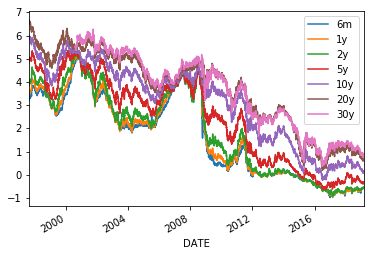

In [279]:
combined3.plot()

In [ ]:
DE10y.tail()

In [114]:
DE2y.tail()

,1y
DATE,
2019-02-26,-0.56
2019-02-27,-0.56
2019-02-28,-0.55
2019-03-01,-0.53
2019-03-04,-0.53


In [115]:
combined = pd.concat([DE2y, DE10y], axis=1)
combined.columns = [ '2y', '10y']

In [118]:
combined.tail()

,2y,10y
DATE,,
2019-02-26,-0.56,0.09
2019-02-27,-0.56,0.11
2019-02-28,-0.55,0.15
2019-03-01,-0.53,0.17
2019-03-04,-0.53,0.16


In [144]:
tenor = ['6m', '1y', '2y', '5y','10y', '20y', '30y']
results = instrument_names(tenor[:])
instruments = results[0]
file_name = results[1]
print(instruments)
print(file_name)
print(file_name[0])

#call_clean(instruments, file_name, tenor)

['DE6m', 'DE1y', 'DE2y', 'DE5y', 'DE10y', 'DE20y', 'DE30y']
['DE6m_input', 'DE1y_input', 'DE2y_input', 'DE5y_input', 'DE10y_input', 'DE20y_input', 'DE30y_input']
DE6m_input


In [ ]:
import pandas as pd

def clean(tenor, instruments, file_name):
    col_names = tenor
    bunds = pd.DataFrame(columns=col_names)
    bunds = bunds.append(instruments[0])
    

combined = pd.concat([DE2y, DE10y], axis=1)
combined.columns = [ '2y', '10y']




col_names =  ['A', 'B', 'C']
my_df  = pd.DataFrame(columns = col_names)
my_df
If you want to add a record to the dataframe it would be better to use:

my_df.loc[len(my_df)] = [2, 4, 5]
You also might want to pass a dictionary:

my_dic = {'A':2, 'B':4, 'C':5}
my_df.loc[len(my_df)] = my_dic 
However if you want to add another dataframe to my_df do as follows:

col_names =  ['A', 'B', 'C']
my_df2  = pd.DataFrame(columns = col_names)
my_df = my_df.append(my_df2)

In [ ]:
tenor = '6m'
DE6m = bunds_clean(DE6m_input, tenor)
DE6m.to_csv("DE6m.csv")

In [ ]:
newDF = pd.DataFrame() #creates a new dataframe that's empty
newDF = newDF.append(oldDF, ignore_index = True) # ignoring index is optional
# try printing some data from newDF
print newDF.head() #again optional 


#def call_clean(bond, tenor):
#    for i in bond:
#        file_name = "i + '_input'"
#        result = bunds_clean(file_name, tenor)
#        result.to_csv("i.csv")
#        return result

def instrument_names(x):
    y = [0] * len(x)
    for i in x:
        index = x.index(i)
        if index < len(x):
            x[index] = 'DE'+ i
            y[index] = x[index] + '_input'
    return x, y

def call_clean(bond, file, tenor):
    for i in tenor:
        #print(tenor[i])
        #print(file)
        result = bunds_clean(file, tenor)
        result.to_csv("i.csv")
        return result
        

#def call_clean(bond, tenor):
#    for i in bond:
#        file_name = "i + '_input'"
#        result = bunds_clean(file_name, tenor)
#        result.to_csv("i.csv")
#        return result



In [67]:
# Todo?
# load daily but append only last row (if new data, not on weekends!) to CSV file
# https://codereview.stackexchange.com/questions/104050/read-daily-files-and-concatenate-them

# One big overview welcome screen - then links (or further down details): nowcast, vix, YC, crude, gold, spx. eur, jpy..

# add more bund tenors, add Aussie, Canada, China, India, Russia, etc etc G10?

# add little coloured overview +/- day, week, month, quarter, year, 2yr? for quick overview
# then show charts 

#GDP nowcast

# inflation? 5y5y breakevens?

# VIX
#live from google finance 
#https://www.google.com/search?source=hp&ei=lMN6XIqtBu6Bk74PvbiKsA0&q=vix+hourly+data&btnK=Google+Search&oq=hourly+data+vix&gs_l=psy-ab.3.0.0i22i30.271.5443..6841...6.0..1.148.1338.21j1......0....1..gws-wiz.....6..35i39j0i67j0j0i203.iMHKCyA6mzw
# history from Fred
# more vol indics: https://fred.stlouisfed.org/categories/32425

# interactive: sliders to change dates etc etc

In [301]:
import pandas as pd

tenor = ['6m', '1y', '2y', '5y','10y', '20y', '30y']
DE = {"DE6m_input": "https://www.bundesbank.de/statistic-rmi/StatisticDownload?tsId=BBK01.WT3210&mode=its&its_fileFormat=csv&its_csvFormat=de&its_currency=default&its_dateFormat=default&its_from=&its_to=",
      "DE1y_input": "https://www.bundesbank.de/statistic-rmi/StatisticDownload?tsId=BBK01.WT3211&mode=its&its_fileFormat=csv&its_csvFormat=de&its_currency=default&its_dateFormat=default&its_from=&its_to=",
      "DE2y_input": "https://www.bundesbank.de/statistic-rmi/StatisticDownload?tsId=BBK01.WT3213&mode=its&its_fileFormat=csv&its_csvFormat=de&its_currency=default&its_dateFormat=default&its_from=&its_to=",
      "DE5y_input": "https://www.bundesbank.de/statistic-rmi/StatisticDownload?tsId=BBK01.WT3219&mode=its&its_fileFormat=csv&its_csvFormat=de&its_currency=default&its_dateFormat=default&its_from=&its_to=",
      "DE10y_input": "https://www.bundesbank.de/statistic-rmi/StatisticDownload?tsId=BBK01.WT3229&mode=its&its_fileFormat=csv&its_csvFormat=de&its_currency=default&its_dateFormat=default&its_from=&its_to=",
      "DE20y_input": "https://www.bundesbank.de/statistic-rmi/StatisticDownload?tsId=BBK01.WT3449&mode=its&its_fileFormat=csv&its_csvFormat=de&its_currency=default&its_dateFormat=default&its_from=&its_to=",
      "DE30y_input": "https://www.bundesbank.de/statistic-rmi/StatisticDownload?tsId=BBK01.WT3500&mode=its&its_fileFormat=csv&its_csvFormat=de&its_currency=default&its_dateFormat=default&its_from=&its_to="}

results = instrument_names(tenor[:])
instruments = results[0]
file_name = results[1]
#print(instruments, file_name)

#col_names1 = tenor
#bunds1 = pd.DataFrame(columns=col_names1)
bunds6m = bunds_clean(DE[file_name[0]], tenor[0])
bunds1y = bunds_clean(DE[file_name[1]], tenor[1])
bunds2y = bunds_clean(DE[file_name[2]], tenor[2])
bunds5y = bunds_clean(DE[file_name[3]], tenor[3])
bunds10y = bunds_clean(DE[file_name[4]], tenor[4])
bunds20y = bunds_clean(DE[file_name[5]], tenor[5])
bunds30y = bunds_clean(DE[file_name[6]], tenor[6])


  


#bunds3 = bunds0.append(bunds2, 'sort=True')
DEbonds = pd.concat([bunds6m,bunds1y, bunds2y, bunds5y, bunds10y, bunds20y, bunds30y], axis=1)
DEbonds.columns = [tenor[0], tenor[1], tenor[2], tenor[3], tenor[4], tenor[5], tenor[6]]





# assigns URL for Bund instruments to input variable




    

#combined = pd.concat([DE2y, DE10y], axis=1)
#combined.columns = [ '2y', '10y']







In [303]:
DEbonds.tail()

,6m,1y,2y,5y,10y,20y,30y
DATE,,,,,,,
2019-02-26,-0.58,-0.58,-0.56,-0.36,0.09,0.61,0.83
2019-02-27,-0.57,-0.57,-0.56,-0.36,0.11,0.63,0.84
2019-02-28,-0.57,-0.57,-0.55,-0.32,0.15,0.66,0.86
2019-03-01,-0.56,-0.56,-0.53,-0.30,0.17,0.70,0.92
2019-03-04,-0.54,-0.55,-0.53,-0.30,0.16,NaN,NaN


In [304]:
def clean(file_name, tenor):
    combined = pd.DataFrame()
    for i in range(len(tenor)):
        result = bunds_clean(DE[file_name[i]], tenor[i])
        combined = pd.concat([combined, result], axis=1)
    return combined

DE_bond_yields = clean(file_name, tenor)
DE_bond_yields.to_csv("DE_bond_yields.csv")

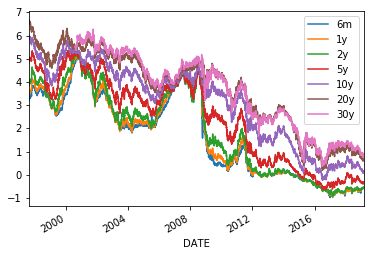

In [255]:
combined.plot()

In [204]:
bunds6m.tail()

,6m
DATE,
2019-02-26,-0.58
2019-02-27,-0.57
2019-02-28,-0.57
2019-03-01,-0.56
2019-03-04,-0.54


In [205]:
bunds1y.tail()

,1y
DATE,
2019-02-26,-0.58
2019-02-27,-0.57
2019-02-28,-0.57
2019-03-01,-0.56
2019-03-04,-0.55


In [199]:
bunds3.tail()

,1y,6m
DATE,,
2019-02-26,-0.58,-0.58
2019-02-27,-0.57,-0.57
2019-02-28,-0.57,-0.57
2019-03-01,-0.56,-0.56
2019-03-04,-0.55,-0.54


In [ ]:
col_names =  ['A', 'B', 'C']
my_df  = pd.DataFrame(columns = col_names)
my_df
If you want to add a record to the dataframe it would be better to use:

my_df.loc[len(my_df)] = [2, 4, 5]
You also might want to pass a dictionary:

my_dic = {'A':2, 'B':4, 'C':5}
my_df.loc[len(my_df)] = my_dic 
However if you want to add another dataframe to my_df do as follows:

col_names =  ['A', 'B', 'C']
my_df2  = pd.DataFrame(columns = col_names)
my_df = my_df.append(my_df2)


def clean(tenor, instruments, file_name):
    col_names = tenor
    bunds = pd.DataFrame(columns=col_names)
    bunds = bunds.append(instruments[0])